In [ ]:

# from google.colab import drive

# drive.mount('/content/gdrive')
# %cd /content/gdrive/MyDrive/SER_Capstone/




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/SER_Capstone


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import os
import random
import sys

import librosa
import librosa.display

from scipy import signal 

import IPython.display as ipd


# import keras
# from keras import layers
# from keras.preprocessing.image import ImageDataGenerator
# from keras.layers import Dense
# from keras.models import Model
# from keras.metrics import Recall
# from tensorflow.keras.optimizers import Adam 
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras import models, layers

import os
import glob
import shutil


import pickle


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [ ]:
Emo_path = 'EmoV-DB_sorted/'
emo_actor_list = os.listdir(Emo_path) 
emo_actor_list.sort

file_actor = []
file_emotion = []
file_path = []

for dir in emo_actor_list:
    if dir.startswith('.'):
        pass
    else:
        actor = os.listdir(Emo_path + dir) 
    
        for emotions in actor:
            if emotions.startswith('.'):
                pass
            else:
                 
                emotion = os.listdir(Emo_path + dir + '/' + emotions) 
                for file in emotion:
                    if file.startswith('.'):
                        pass
                    else:
                        file_emotion.append(emotions.lower())
                        file_path.append(Emo_path + dir + '/' + emotions  + '/' + file)
                        file_actor.append(dir)
     

In [ ]:
print(f'Number oaf file paths: {len(file_path)},\
      Number of emotions listed: {len(file_emotion)},\
      Number of actors listed: {len(file_actor)}')

Number oaf file paths: 6898,      Number of emotions listed: 6898,      Number of actors listed: 6898


In [ ]:
df = pd.DataFrame({"file_path" : file_path, "actor" : file_actor})
df["sex"] = df["actor"].apply(lambda x: "female" if x in ["jenie", "bea"] else 'male')
df["emotion"] = (file_emotion)

df

,file_path,actor,sex,emotion
0,EmoV-DB_sorted/sam/Neutral/sam_neutral_00057.wav,sam,male,neutral
1,EmoV-DB_sorted/sam/Neutral/sam_neutral_00068.wav,sam,male,neutral
2,EmoV-DB_sorted/sam/Neutral/sam_neutral_00392.wav,sam,male,neutral
3,EmoV-DB_sorted/sam/Neutral/sam_neutral_00329.wav,sam,male,neutral
4,EmoV-DB_sorted/sam/Neutral/sam_neutral_00051.wav,sam,male,neutral
...,...,...,...,...
6893,EmoV-DB_sorted/josh/Amused/josh_amused00179.wav,josh,male,amused
6894,EmoV-DB_sorted/josh/Amused/josh_amused00045.wav,josh,male,amused
6895,EmoV-DB_sorted/josh/Amused/josh_amused00078.wav,josh,male,amused
6896,EmoV-DB_sorted/josh/Amused/josh_amused00248.wav,josh,male,amused


### Creating a Larger Dataset with Randomized Filtering (Maybe? If I have Time )
#### Will come back to this for a more polished final product

#### 1 will add noise to many  randomized files (in random amounts but not enough to drown out speech)
#### 2 Randomly pitch up/ down data by a variable percentage (again not enough to make incomprehensible)
#### 3 Speed up/slow down (while maintaining pitch) by up to 50%
#### Can do a few pass-throughs of dataset 
#### Randomly assign 1,2, 3 or a combination to a file 


## Come back to this in the future (after MVP or after )

### Increase Dataset with new data to train on with augmented data - (add noise) add more diverse voices/accents

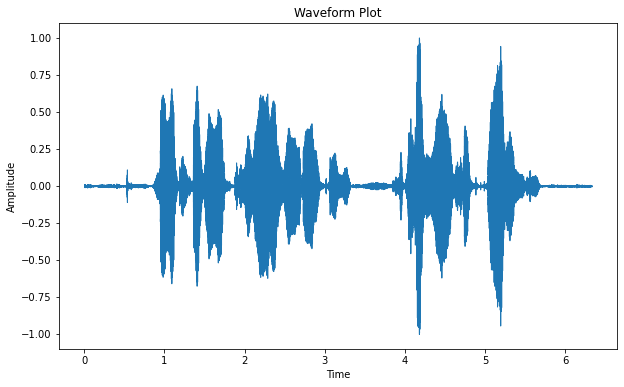

In [ ]:
file_name='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)
fig, ax = plt.subplots(figsize=(10,6))
librosa.display.waveshow(audio_data,sr=sampling_rate)
# ipd.Audio(file_name)
ax.set(title='Waveform Plot', ylabel='Amplitude')
ax.label_outer();
# plt.savefig('img/waveforms/sam_amused_00003.wav')





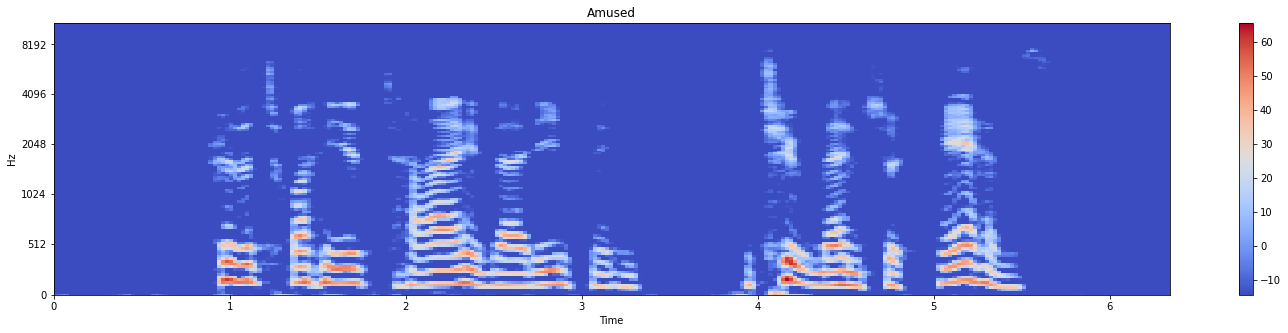

In [ ]:
# Creating A basic Mel Spectrogram from our audio sample above 
spectrogram = librosa.feature.melspectrogram(audio_data)
s_db = librosa.amplitude_to_db(spectrogram)
fig, ax = plt.subplots(figsize=(25, 5))

amuse = librosa.display.specshow(s_db, sr=sampling_rate, x_axis='time', y_axis='mel', ax=ax)
ax.set(title="Amused")
fig.colorbar(amuse, ax=ax);
##plt.savefig('file/path')

## EDA Visuals

In [ ]:
df.emotion.value_counts()

sleepy       1721
neutral      1569
amused       1321
angry        1268
disgusted    1019
Name: emotion, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


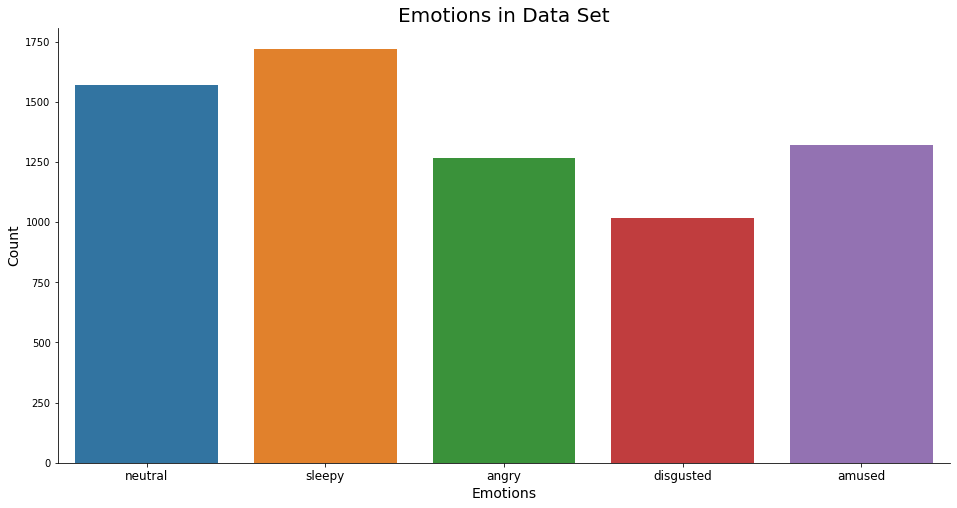

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(df.emotion)
plt.title('Emotions in Data Set', size=20)
plt.ylabel('Count', size=14)
plt.xlabel('Emotions', size=14)
plt.xticks(size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
# plt.savefig('img/plots/Emotion_count')
plt.show()

sam      2453
jenie    1795
bea      1787
josh      863
Name: actor, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


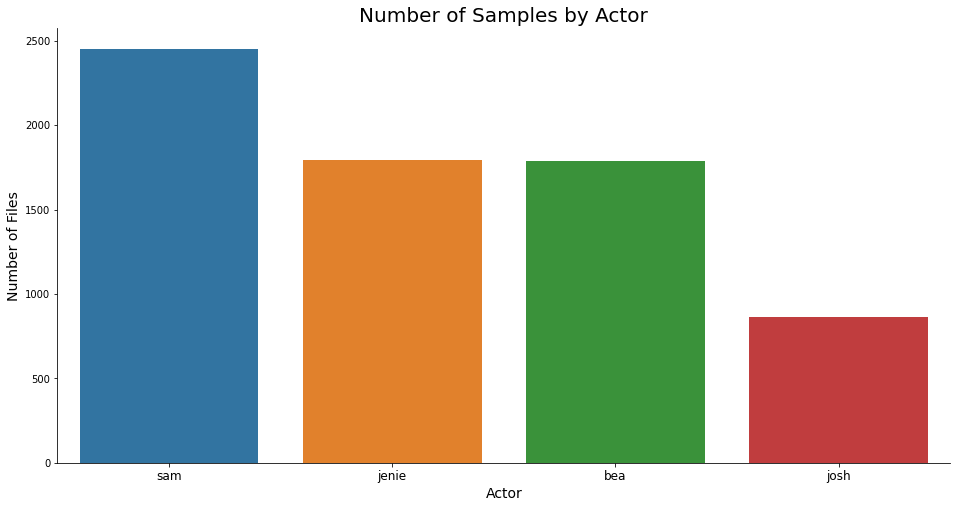

In [ ]:
print(df.actor.value_counts())

fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(df.actor)
plt.title('Number of Samples by Actor', size=20)
plt.ylabel('Number of Files', size=14)
plt.xlabel('Actor', size=14)
plt.xticks(size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
# plt.savefig('img/plots/Actor_count')
plt.show()

female    3582
male      3316
Name: sex, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


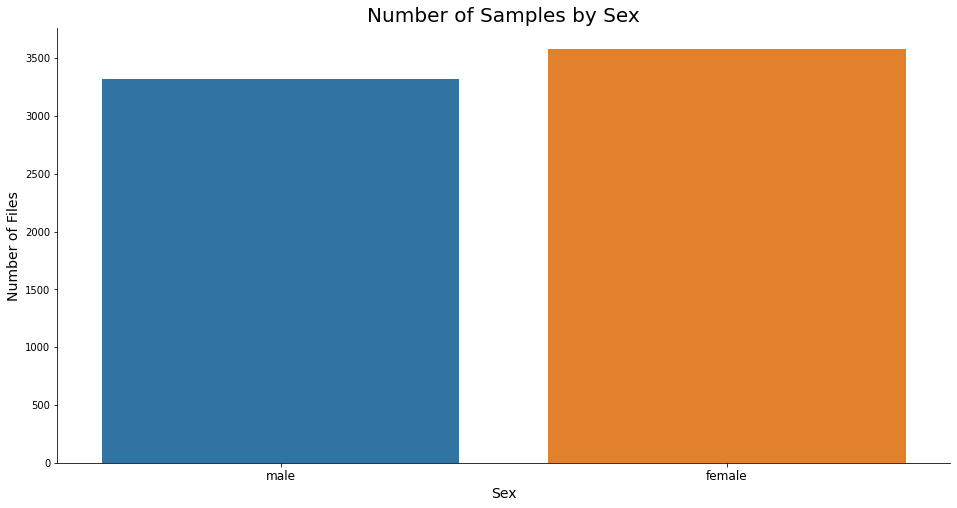

In [ ]:
print(df.sex.value_counts())

fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(df.sex)
plt.title('Number of Samples by Sex', size=20)
plt.ylabel('Number of Files', size=14)
plt.xlabel('Sex', size=14)
plt.xticks(size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
# plt.savefig('img/plots/sex_count')
plt.show()

We will need to agument data to account for the variablity in human speech and audio equipment 
Will add random whitenoise
Will randomly speed up/slow down audio
NO PITCH CHANGE!

Will then do Time and Frequency Masking with SpecAugment to prevent overfitting and to help the model generalise better. The masked sections are replaced with the mean value. https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5 for markdown info writeup


## Augmenting the Data

Will augment raw files and save as new randomized files in new directory_1

Will get spectrograms and save in new directory_2

Then will do Time and Frequency Masking and get finalized spectrograms and save in new directory_3

# Will come back to Data Augmentation later for MVP


# For now lets just convert to raw spectrograms for the baseline


In [ ]:
def spectrogrammer(path):
    
    audio_data, sampling_rate = librosa.load(path)
    
    spectro = librosa.feature.melspectrogram(audio_data)
    
    s_db = librosa.amplitude_to_db(spectro)
    
    fig, ax = plt.subplots(figsize=(20, 5))
    
    new_s = librosa.display.specshow(s_db, sr=sampling_rate, ax=ax)
    
#     ax.set(title=f"{path}")
    
#     fig.colorbar(new_s, ax=ax) #good for my analysis but not needed for CNN
    os.path.basename(path)

    path_stripped = os.path.basename(path).strip(".wav")
    
    unique_name = path_stripped
#     ax.set(title=f"{unique_name}")    
    new_path = ('img/spectrograms_no_aug_color/'+ unique_name)
    plt.savefig(new_path)

In [ ]:
# import opensoundscape
# from opensoundscape.audio import Audio
# from opensoundscape.spectrogram import Spectrogram



# def spectrogrammer2(patho):
    
#     audio_object = Audio.from_file(patho)
#     spectrogram_object = Spectrogram.from_audio(audio_object)
#     image = spectrogram_object.to_image(shape=(512,1024))
#     path_stripped = os.path.basename(patho).strip(".wav")
#     unique_name = path_stripped
#     new_path = ('img/spectrograms_no_aug_bw/'+ unique_name)
#     image.save(new_path+".png")

# #Much, Much, Much faster but in b&W

In [ ]:
# tester = df.head()

# tester["file_path"].apply(lambda x: spectrogrammer2(x))

In [ ]:
# df.head()
df["file_path"].count()

6898

In [ ]:
# df["file_path"].apply(lambda x: spectrogrammer(x))#Use color image for better contrast
# df["file_path"].apply(lambda x: spectrogrammer2(x)) #Use color image for better contrast

In [ ]:
img_path = 'img/'
img_dir_list = os.listdir(img_path) 
img_dir_list.sort

non_aug_path = []

for dir in img_dir_list:
    if dir.startswith('spectrograms_no_aug_color'):
        files = os.listdir(img_path + dir)
        for file in files:
            if file.startswith('.'):
                pass
            else:
                non_aug_path.append(img_path + dir + '/' + file)
    else: 
        pass
    
    

In [ ]:
len(non_aug_path)

5301

In [ ]:
# non_aug_path

In [ ]:
df

,file_path,actor,sex,emotion
0,EmoV-DB_sorted/sam/Neutral/sam_neutral_00057.wav,sam,male,neutral
1,EmoV-DB_sorted/sam/Neutral/sam_neutral_00068.wav,sam,male,neutral
2,EmoV-DB_sorted/sam/Neutral/sam_neutral_00392.wav,sam,male,neutral
3,EmoV-DB_sorted/sam/Neutral/sam_neutral_00329.wav,sam,male,neutral
4,EmoV-DB_sorted/sam/Neutral/sam_neutral_00051.wav,sam,male,neutral
...,...,...,...,...
6893,EmoV-DB_sorted/josh/Amused/josh_amused00179.wav,josh,male,amused
6894,EmoV-DB_sorted/josh/Amused/josh_amused00045.wav,josh,male,amused
6895,EmoV-DB_sorted/josh/Amused/josh_amused00078.wav,josh,male,amused
6896,EmoV-DB_sorted/josh/Amused/josh_amused00248.wav,josh,male,amused


In [ ]:

def path_rewriter(items):
    path_pieces = items.split("/", 3)
    stripped = path_pieces[3].strip(".wav")
    return(f"img/spectrograms_no_aug_color/{stripped}.png")


    
df["no_aug_img_path"] = df["file_path"].apply(lambda x : path_rewriter(x))

In [ ]:
df

,file_path,actor,sex,emotion,no_aug_img_path
0,EmoV-DB_sorted/sam/Neutral/sam_neutral_00057.wav,sam,male,neutral,img/spectrograms_no_aug_color/sam_neutral_0005...
1,EmoV-DB_sorted/sam/Neutral/sam_neutral_00068.wav,sam,male,neutral,img/spectrograms_no_aug_color/sam_neutral_0006...
2,EmoV-DB_sorted/sam/Neutral/sam_neutral_00392.wav,sam,male,neutral,img/spectrograms_no_aug_color/sam_neutral_0039...
3,EmoV-DB_sorted/sam/Neutral/sam_neutral_00329.wav,sam,male,neutral,img/spectrograms_no_aug_color/sam_neutral_0032...
4,EmoV-DB_sorted/sam/Neutral/sam_neutral_00051.wav,sam,male,neutral,img/spectrograms_no_aug_color/sam_neutral_0005...
...,...,...,...,...,...
6893,EmoV-DB_sorted/josh/Amused/josh_amused00179.wav,josh,male,amused,img/spectrograms_no_aug_color/josh_amused00179...
6894,EmoV-DB_sorted/josh/Amused/josh_amused00045.wav,josh,male,amused,img/spectrograms_no_aug_color/josh_amused00045...
6895,EmoV-DB_sorted/josh/Amused/josh_amused00078.wav,josh,male,amused,img/spectrograms_no_aug_color/josh_amused00078...
6896,EmoV-DB_sorted/josh/Amused/josh_amused00248.wav,josh,male,amused,img/spectrograms_no_aug_color/josh_amused00248...


# Now that we have our unaltered spectrograms and the matching paths, we can do our baseline Model for multiclass identification

In [ ]:
toencode_df = df.copy()
toencode_df.drop(["file_path", "actor", "sex"], axis = 1) #dropping uneeded columns for path/emotion
toencode_df = toencode_df[['no_aug_img_path', 'emotion']] #reordering 
toencode_df

from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')
target_encode = pd.DataFrame(encoder.fit_transform(toencode_df[['emotion']]).toarray())

encoded_df = toencode_df.join(target_encode)
encoded_df

,no_aug_img_path,emotion,0,1,2,3,4
0,img/spectrograms_no_aug_color/sam_neutral_0005...,neutral,0.0,0.0,0.0,1.0,0.0
1,img/spectrograms_no_aug_color/sam_neutral_0006...,neutral,0.0,0.0,0.0,1.0,0.0
2,img/spectrograms_no_aug_color/sam_neutral_0039...,neutral,0.0,0.0,0.0,1.0,0.0
3,img/spectrograms_no_aug_color/sam_neutral_0032...,neutral,0.0,0.0,0.0,1.0,0.0
4,img/spectrograms_no_aug_color/sam_neutral_0005...,neutral,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
6893,img/spectrograms_no_aug_color/josh_amused00179...,amused,1.0,0.0,0.0,0.0,0.0
6894,img/spectrograms_no_aug_color/josh_amused00045...,amused,1.0,0.0,0.0,0.0,0.0
6895,img/spectrograms_no_aug_color/josh_amused00078...,amused,1.0,0.0,0.0,0.0,0.0
6896,img/spectrograms_no_aug_color/josh_amused00248...,amused,1.0,0.0,0.0,0.0,0.0


You can see amused = 0, angry =1, disgusted = 2, neutral is 3, and sleepy is 4

In [ ]:
# encoded_df[encoded_df[4] == 1.0]

In [ ]:
encoded_df.columns = ["no_aug_img_path",	"emotion", 	"amused", "angry", "disgusted", "neutral", "sleepy"]
ready_to_split = encoded_df.drop(columns = "emotion")

Splitting the Files into a test and train folder


for 

In [ ]:
X = ready_to_split["no_aug_img_path"]
y = ready_to_split.drop(columns = "no_aug_img_path")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle = True)


In [ ]:
y_train


,amused,angry,disgusted,neutral,sleepy
4538,1.0,0.0,0.0,0.0,0.0
3758,0.0,0.0,0.0,1.0,0.0
2271,1.0,0.0,0.0,0.0,0.0
947,0.0,0.0,0.0,0.0,1.0
877,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
3772,0.0,0.0,0.0,1.0,0.0
5191,0.0,0.0,1.0,0.0,0.0
5226,0.0,0.0,1.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,1.0


Will now separated train data into own folder.

In [ ]:
# replaced_list = []

# def relocater(x, string_to_remove, replaced, replaced_list):

#   #Will relocate every file to new train folder now that we have done our split
  
  
  
  
#   newpath = x.replace(string_to_remove, replaced))
#   replaced_list.append(new_path)
  
  
#   img_path = 'img/spectrograms_no_aug_color'
#   img_dir_list = os.listdir(img_path) 
#   img_dir_list.sort

#   non_aug_path = []

#   for dir in img_dir_list:
#       if dir.startswith('spectrograms_no_aug_color'):
#           files = os.listdir(img_path + dir)
#           for file in files:
#               if file.startswith('.'):
#                   pass
#               else:
#                   non_aug_path.append(img_path + dir + '/' + file)
#       else: 
#           pass
    

# train_paths = []
# test_paths = []

# img_path = 'img/spectrograms_no_aug_color'
# files = os.listdir(img_path)
# for file in files:
#   if file.startswith('.'):
#     pass

#   elif X_train.str.contains(img_path + '/' + file).any():
#       new_path = "img/no_aug_train/" + file
#       os.rename(img_path + '/' + file, new_path)
#       train_paths.append(new_path)

#   elif X_test.str.contains(img_path + '/' + file).any():
#       new_path_2 = "img/no_aug_test/" + file
#       os.rename(img_path + '/' + file, new_path_2)
#       test_paths.append(new_path_2)
#   else:
#     pass

In [ ]:
len(train_paths)

5168

In [ ]:
len(test_paths)




1725

In [ ]:
# img_path = 'img/spectrograms_no_aug_color'
# files = os.listdir(img_path)
# for file in files:
#   if file.startswith('.'):
#     pass

#   elif X_train.str.contains(img_path + '/' + file).any():
#       new_path = "img/no_aug_train/" + file
#       os.rename(img_path + '/' + file, new_path)
#       train_paths.append(new_path)

#   elif X_test.str.contains(img_path + '/' + file).any():
#       new_path_2 = "img/no_aug_test/" + file
#       os.rename(img_path + '/' + file, new_path_2)
#       test_paths.append(new_path_2)
#   else:
#     pass

In [ ]:


# img_path = 'img/no_aug_train'
# files = os.listdir(img_path)
# for file in files:
#   if file.startswith('.') or :
#     pass

#   elif ("amused") in file:
#       new_path = "img/no_aug_train/amused/" + file
#       os.rename(img_path + '/' + file, new_path)
#   elif ("angry") in file:
#       new_path = "img/no_aug_train/angry/" + file
#       os.rename(img_path + '/' + file, new_path)
#   elif ("disgusted") in file:
#       new_path = "img/no_aug_train/disgusted/" + file
#       os.rename(img_path + '/' + file, new_path)
#   elif ("neutral") in file:
#       new_path = "img/no_aug_train/neutral/" + file
#       os.rename(img_path + '/' + file, new_path)
#   elif ("sleepy") in file:
#       new_path = "img/no_aug_train/sleepy/" + file
#       os.rename(img_path + '/' + file, new_path)

#   else:
#     pass

OSError: ignored

In [ ]:


# img_path = 'img/no_aug_test'
# files = os.listdir(img_path)
# for file in files:
#   if file.startswith('.'):
#     pass

#   elif ("amused") in file:
#       new_path = "img/no_aug_train/amused" + file
#       os.rename(img_path + '/' + file, new_path)
#   elif ("angry") in file:
#       new_path = "img/no_aug_train/angry" + file
#       os.rename(img_path + '/' + file, new_path)
#   elif ("disgusted") in file:
#       new_path = "img/no_aug_train/disgusted" + file
#       os.rename(img_path + '/' + file, new_path)
#   elif ("neutral") in file:
#       new_path = "img/no_aug_train/neutral" + file
#       os.rename(img_path + '/' + file, new_path)
#   elif ("sleepy") in file:
#       new_path = "img/no_aug_train/sleepy" + file
#       os.rename(img_path + '/' + file, new_path)

#   else:
#     pass

# Had A weird error that made about 1/3 of my images disappear which will be fixed. If anything this smaller set will help the baseline run faster (Have to think of the positives at this Point)

# Baseline Model

This took probably way too many attempts to run because Keras Hates me

In [ ]:


classes = [	"amused", "angry", "disgusted", "neutral", "sleepy"]


traingen = ImageDataGenerator(rescale=1/255, validation_split=0.10)
testgen = ImageDataGenerator(rescale=1/255)


train_data = traingen.flow_from_directory(
    directory='img/no_aug_train/',
    target_size=(64, 64),
    classes = classes,
    class_mode='categorical',
    subset = "training",
    seed = 42
)
val_data = traingen.flow_from_directory(
    directory='img/no_aug_train/',
    target_size=(64, 64),
    classes = classes,
    class_mode='categorical',
    subset = "validation",
    seed = 42
    )    
    
    
test_data = testgen.flow_from_directory(
    directory='img/no_aug_test',
    target_size=(64, 64),
    classes = classes,
    class_mode='categorical',
    seed = 42
)


baseline = tf.keras.models.Sequential()
baseline.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
baseline.add(tf.keras.layers.Flatten())
baseline.add(tf.keras.layers.Dense(5, activation='softmax'))

baseline.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
baseline.summary()
baseline.fit(x=train_data, validation_data=val_data, epochs=1)



Found 2725 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
Found 669 images belonging to 5 classes.
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 62, 62, 10)        280       
                                                                 
 flatten_11 (Flatten)        (None, 38440)             0         
                                                                 
 dense_21 (Dense)            (None, 5)                 192205    
                                                                 
Total params: 192,485
Trainable params: 192,485
Non-trainable params: 0
_________________________________________________________________
86/86 [==============================] - 51s 578ms/step - loss: 1.7752 - accuracy: 0.3567 - val_loss: 1.1806 - val_accuracy: 0.5167


# First Basic Model

We will add an additional Conv2d Layer and a Max Pooling layer as well as more filters to the originsl Conv2d Layer

In [47]:
classes = [	"amused", "angry", "disgusted", "neutral", "sleepy"]


traingen = ImageDataGenerator(rescale=1/255, validation_split=0.10)
testgen = ImageDataGenerator(rescale=1/255)


train_data = traingen.flow_from_directory(
    directory='img/no_aug_train/',
    target_size=(64, 64),
    classes = classes,
    class_mode='categorical',
    subset = "training",
    seed = 42
)
val_data = traingen.flow_from_directory(
    directory='img/no_aug_train/',
    target_size=(64, 64),
    classes = classes,
    class_mode='categorical',
    subset = "validation",
    seed = 42
    )    
    
    
test_data = testgen.flow_from_directory(
    directory='img/no_aug_test',
    target_size=(64, 64),
    classes = classes,
    class_mode='categorical',
    seed = 42
)


model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Conv2D(filters=70, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model_1.add(tf.keras.layers.Conv2D(filters=35, kernel_size=3, activation='relu'))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(5, activation='softmax'))


model_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_1.summary()
model_1.fit(x=train_data, validation_data=val_data, epochs=1)



Found 2725 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
Found 669 images belonging to 5 classes.
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 62, 62, 70)        1960      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 70)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 29, 29, 35)        22085     
                                                                 
 flatten_12 (Flatten)        (None, 29435)             0         
                                                                 
 dense_22 (Dense)            (None, 5)                 147180    
                                                             

So we have had some improvement but will need to clean up the code, images to add more variation and then add more layers!

# Data Prep Pipeline


## What happens when we do encounter silence??

## [RESAMPLE AT CONSTANT RATE??: ](http://opensoundscape.org/en/latest/tutorials/audio_and_spectrogram.html#:~:text=To%20save%20the%20created%20spectrogram,Library%20(PIL)%20Image%20object.&text=Save%20the%20PIL%20Image%20using,want%20to%20save%20the%20image.)

Go through all files in directory and add to df if name is in original path in new column. If name has emotion can strip it. Can augment sound files and re-save sprectrograms of augmented. (Combine with originals for larger dataset? or just use noisier data ?)

Next we need to augment our data in order to prevent over-fitting and make our model more generalizable.
We will do this by injecting noise, slowing the sound clips, speeding up the sound clips, and 

We will then extract features, trim the data, extract features without augmentation, add noise a and vertically stack (essentially stacking an array and turning into a matrix which we will then convert to our spectrogram, then add stretch vert stack, and pitch v stack )

In [ ]:
def noise(data):
    amplitude = 0.05*np.random.uniform()*np.amax(data)
    data = data + amplitude*np.random.normal(size=data.shape[0])
    return data

def speed_random(data):
    random_rate = round(random.uniform(0.5, 1.5), 2)
    return librosa.effects.time_stretch(data, random_rate)


def pitch(data, sampling_rate):
    random_pitch = round(random.uniform(.5, 3), 1)
    return librosa.effects.pitch_shift(data, sampling_rate, random_pitch)

def silence_trimmer(data_sampling_rate):
    return


### NEED SILENCE TRIMMER??

In [ ]:
file_name='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)
# ipd.Audio(audio_data, rate=sampling_rate) #Base Audio


x = noise(audio_data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

In [ ]:
file_name='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)
# ipd.Audio(audio_data, rate=sampling_rate)
x = speed_random(audio_data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

In [ ]:
file_name='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)
# ipd.Audio(audio_data, rate=sampling_rate)
x = pitch(audio_data, sampling_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

# Next will fix data disappearance! possibly augment sound data/trim silence

Data missing was from faulty folder function. Will again do train/test split COPYING images into separate train and test folders this time. Will then manually move files into emotion folders and reupload(?)